In [2]:
# [1] download and install pyspark in Google Colab
!pip3 install pyspark


In [6]:
from pyspark.sql import SparkSession
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()

In [13]:
df = spark.read.csv("./kddcup.data.gz")
df.show()

+---+---+----+---+---+-----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|_c0|_c1| _c2|_c3|_c4|  _c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|   _c41|
+---+---+----+---+---+-----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|  0|tcp|http| SF|215|45076|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   1|0.00|0.00|0.00|0.00|1.00|0.00|0.00|   0|   0|0.00|0.00|0.00|0.00|0.00|0.00|0.00|0.00|normal.|
|  0|tcp|http| SF|162| 4528|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   2|   2|0.00|0.00|0.00|0.00|1.00|0.00|0.00|   1|   1|1.00|0.00

In [14]:
df.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41']

In [18]:
df2 = df.withColumnRenamed("_c0","duration") \
 .withColumnRenamed("_c1","protocol_type")\
 .withColumnRenamed("_c2","service")\
 .withColumnRenamed("_c3","flag")\
 .withColumnRenamed("_c4","src_bytes")\
 .withColumnRenamed("_c5","dst_bytes")\
 .withColumnRenamed("_c6","land")\
 .withColumnRenamed("_c7","wrong_fragment")\
 .withColumnRenamed("_c8","urgent")\
 .withColumnRenamed("_c9","host")\
 .withColumnRenamed("_c10","num_failed_logins")\
 .withColumnRenamed("_c11","logged_in")\
 .withColumnRenamed("_c12","num_compromised")\
 .withColumnRenamed("_c13","root_shell")\
 .withColumnRenamed("_c14","su_attempted")\
 .withColumnRenamed("_c15","num_root")\
 .withColumnRenamed("_c16","num_file_creations")\
 .withColumnRenamed("_c17","num_shells")\
 .withColumnRenamed("_c18","num_access_files")\
 .withColumnRenamed("_c19","num_outbound_cmds")\
 .withColumnRenamed("_c20","is_host_login")\
 .withColumnRenamed("_c21","is_guest_login")\
 .withColumnRenamed("_c22","count")\
 .withColumnRenamed("_c23","srv_count")\
 .withColumnRenamed("_c24","serror_rate")\
 .withColumnRenamed("_c25","srv_serror_rate")\
 .withColumnRenamed("_c26","rerror_rate")\
 .withColumnRenamed("_c27","srv_rerror_rate")\
 .withColumnRenamed("_c28","same_srv_rate")\
 .withColumnRenamed("_c29","diff_srv_rate")\
 .withColumnRenamed("_c30","srv_diff_host_rate")\
 .withColumnRenamed("_c31","dst_host_count")\
 .withColumnRenamed("_c32","dst_host_srv_count")\
 .withColumnRenamed("_c33","dst_host_same_srv_rate")\
 .withColumnRenamed("_c34","dst_host_diff_srv_rate")\
 .withColumnRenamed("_c35","dst_host_same_src_port_rate")\
 .withColumnRenamed("_c36","dst_host_srv_diff_host_rate")\
 .withColumnRenamed("_c37","dst_host_serror_rate")\
 .withColumnRenamed("_c38","dst_host_srv_serror_rate")\
 .withColumnRenamed("_c39","dst_host_rerror_rate")\
 .withColumnRenamed("_c40","dst_host_srv_rerror_rate")\
 .withColumnRenamed("_c41","connection_status")


In [19]:
df2.createOrReplaceTempView("KddView")
sqlDF = spark.sql("SELECT * FROM KddView")
sqlDF.show()

+--------+-------------+-------+----+---------+---------+----+--------------+------+----+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-----------------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|host|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_

In [21]:
sqlDF = spark.sql("SELECT connection_status, count(*) FROM KddView GROUP BY connection_status")
sqlDF.show()


+-----------------+--------+
|connection_status|count(1)|
+-----------------+--------+
|     warezmaster.|      20|
|           smurf.| 2807886|
|             pod.|     264|
|            imap.|      12|
|            nmap.|    2316|
|    guess_passwd.|      53|
|         ipsweep.|   12481|
|       portsweep.|   10413|
|           satan.|   15892|
|            land.|      21|
|      loadmodule.|       9|
|       ftp_write.|       8|
| buffer_overflow.|      30|
|         rootkit.|      10|
|     warezclient.|    1020|
|        teardrop.|     979|
|            perl.|       3|
|             phf.|       4|
|        multihop.|       7|
|         neptune.| 1072017|
+-----------------+--------+
only showing top 20 rows



<Axes: xlabel='connection_status'>

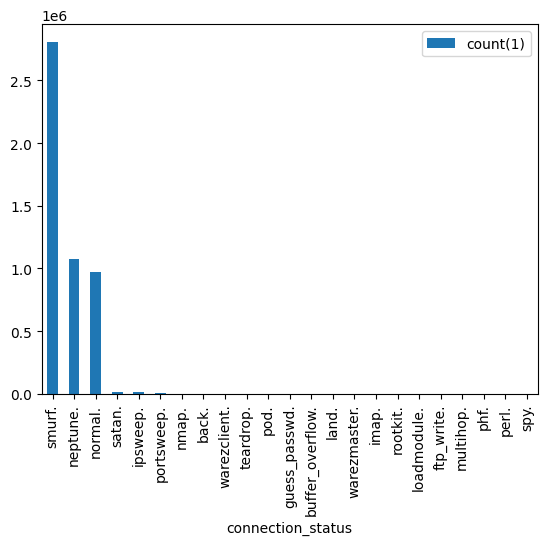

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x
='connection_status', y='count(1)', kind = 'bar')

<Axes: xlabel='connection_status'>

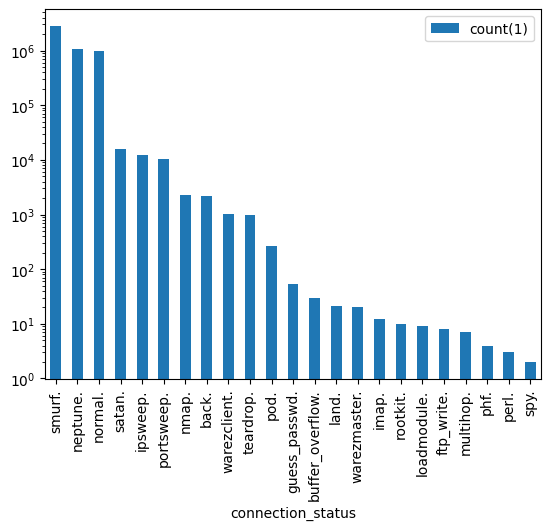

In [23]:
pandas_df.sort_values(by='count(1)',ascending=False).plot(x
='connection_status', y='count(1)', kind = 'bar', logy=True)


In [24]:
sqlDF = spark.sql("SELECT protocol_type, count(*) FROM KddView GROUP BY protocol_type")
sqlDF.show()

+-------------+--------+
|protocol_type|count(1)|
+-------------+--------+
|          tcp| 1870598|
|          udp|  194288|
|         icmp| 2833545|
+-------------+--------+



<Axes: xlabel='protocol_type'>

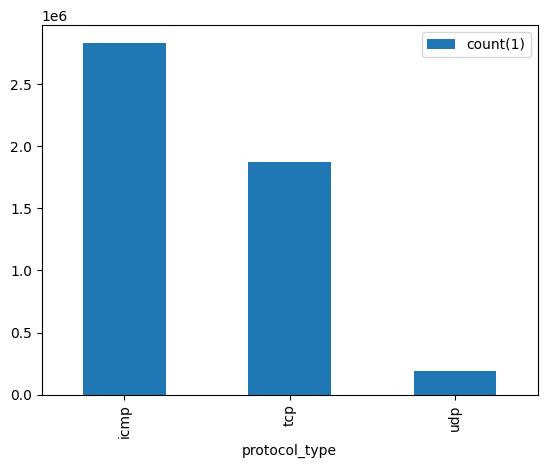

In [25]:
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x
='protocol_type', y='count(1)', kind = 'bar')


<Axes: ylabel='count(1)'>

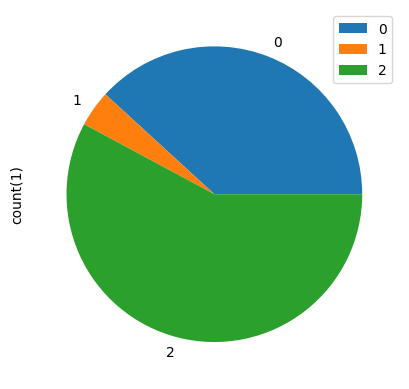

In [26]:
pandas_df.plot(x ='protocol_type', y='count(1)', kind = 'pie')

In [27]:
sqlDF = spark.sql("SELECT DISTINCT service from KddView where service not in ('-') order by service")
sqlDF.show()

+--------+
| service|
+--------+
|     IRC|
|     X11|
|  Z39_50|
|     aol|
|    auth|
|     bgp|
| courier|
|csnet_ns|
|     ctf|
| daytime|
| discard|
|  domain|
|domain_u|
|    echo|
|   eco_i|
|   ecr_i|
|     efs|
|    exec|
|  finger|
|     ftp|
+--------+
only showing top 20 rows



In [28]:
sqlDF = spark.sql("SELECT service, count(*) from KddView where service not in ('-') group by service order by count(*) desc")
sqlDF.show()


+--------+--------+
| service|count(1)|
+--------+--------+
|   ecr_i| 2811660|
| private| 1100831|
|    http|  623091|
|    smtp|   96554|
|   other|   72653|
|domain_u|   57782|
|ftp_data|   40697|
|   eco_i|   16338|
|  finger|    6891|
|   urp_i|    5378|
|     ftp|    5214|
|  telnet|    4277|
|   ntp_u|    3833|
|    auth|    3382|
|   pop_3|    1981|
|    time|    1579|
|  domain|    1113|
|  Z39_50|    1078|
|  gopher|    1077|
|     mtp|    1076|
+--------+--------+
only showing top 20 rows



<Axes: xlabel='service'>

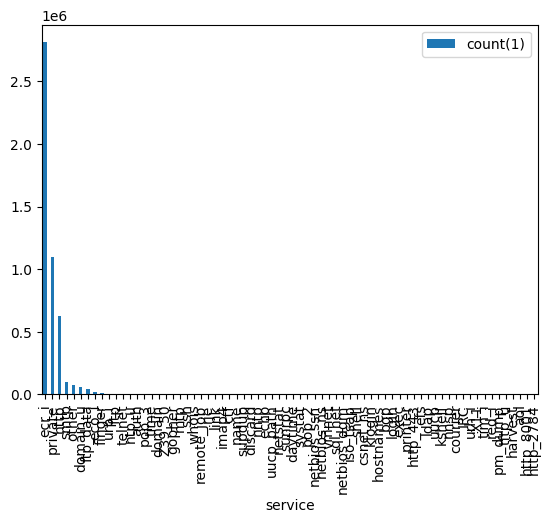

In [29]:
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x
='service', y='count(1)', kind = 'bar')

<Axes: ylabel='count(1)'>

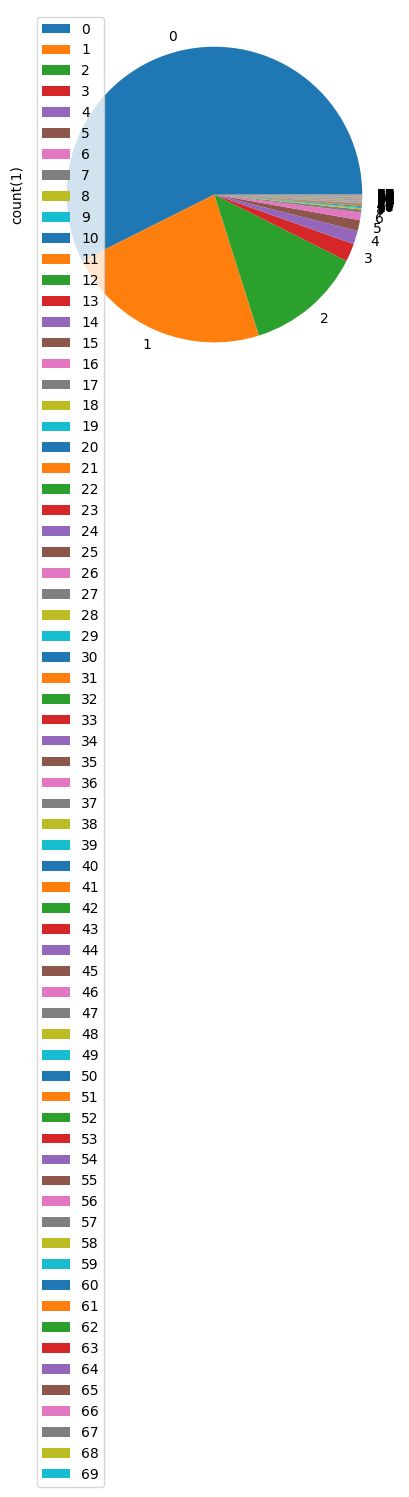

In [30]:
pandas_df.plot(x ='service', y='count(1)', kind = 'pie')


In [31]:
sqlDF = spark.sql("SELECT DISTINCT connection_status from KddView order by connection_status")
sqlDF.show()

+-----------------+
|connection_status|
+-----------------+
|            back.|
| buffer_overflow.|
|       ftp_write.|
|    guess_passwd.|
|            imap.|
|         ipsweep.|
|            land.|
|      loadmodule.|
|        multihop.|
|         neptune.|
|            nmap.|
|          normal.|
|            perl.|
|             phf.|
|             pod.|
|       portsweep.|
|         rootkit.|
|           satan.|
|           smurf.|
|             spy.|
+-----------------+
only showing top 20 rows



In [32]:
sqlDF = spark.sql("SELECT connection_status, count(*) from KddView group by connection_status order by count(*) desc")
sqlDF.show()

+-----------------+--------+
|connection_status|count(1)|
+-----------------+--------+
|           smurf.| 2807886|
|         neptune.| 1072017|
|          normal.|  972781|
|           satan.|   15892|
|         ipsweep.|   12481|
|       portsweep.|   10413|
|            nmap.|    2316|
|            back.|    2203|
|     warezclient.|    1020|
|        teardrop.|     979|
|             pod.|     264|
|    guess_passwd.|      53|
| buffer_overflow.|      30|
|            land.|      21|
|     warezmaster.|      20|
|            imap.|      12|
|         rootkit.|      10|
|      loadmodule.|       9|
|       ftp_write.|       8|
|        multihop.|       7|
+-----------------+--------+
only showing top 20 rows



<Axes: xlabel='connection_status'>

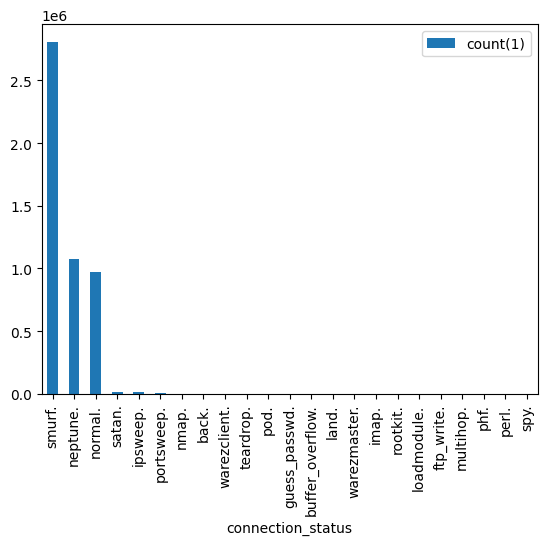

In [33]:
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x
='connection_status', y='count(1)', kind = 'bar')

<Axes: xlabel='connection_status'>

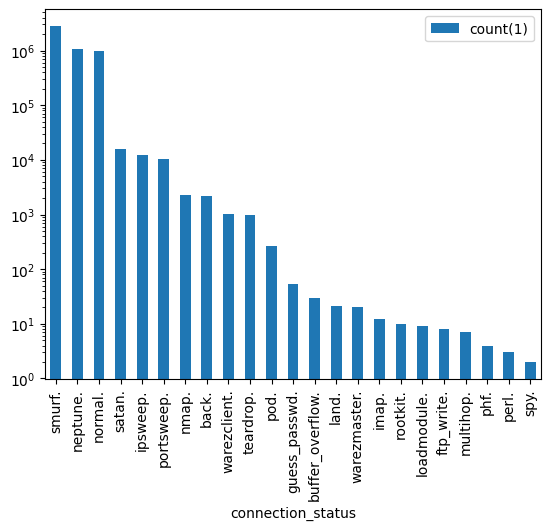

In [34]:
pandas_df.sort_values(by='count(1)',ascending=False).plot(x
='connection_status', y='count(1)', kind = 'bar', logy=True)

In [35]:
sqlDF = spark.sql("SELECT DISTINCT service from KddView where service not in ('-') order by service")
sqlDF.show()


+--------+
| service|
+--------+
|     IRC|
|     X11|
|  Z39_50|
|     aol|
|    auth|
|     bgp|
| courier|
|csnet_ns|
|     ctf|
| daytime|
| discard|
|  domain|
|domain_u|
|    echo|
|   eco_i|
|   ecr_i|
|     efs|
|    exec|
|  finger|
|     ftp|
+--------+
only showing top 20 rows



In [36]:
sqlDF = spark.sql("SELECT service, count(*) from KddView where service not in ('-') group by service order by count(*) desc")
sqlDF.show()


+--------+--------+
| service|count(1)|
+--------+--------+
|   ecr_i| 2811660|
| private| 1100831|
|    http|  623091|
|    smtp|   96554|
|   other|   72653|
|domain_u|   57782|
|ftp_data|   40697|
|   eco_i|   16338|
|  finger|    6891|
|   urp_i|    5378|
|     ftp|    5214|
|  telnet|    4277|
|   ntp_u|    3833|
|    auth|    3382|
|   pop_3|    1981|
|    time|    1579|
|  domain|    1113|
|  Z39_50|    1078|
|  gopher|    1077|
|     mtp|    1076|
+--------+--------+
only showing top 20 rows



<Axes: xlabel='service'>

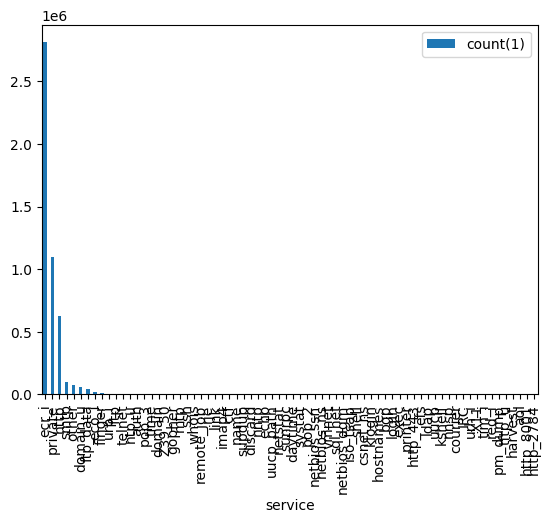

In [37]:
pandas_df = sqlDF.toPandas()
pandas_df.sort_values(by='count(1)',ascending=False).plot(x
='service', y='count(1)', kind = 'bar')

<Axes: xlabel='service'>

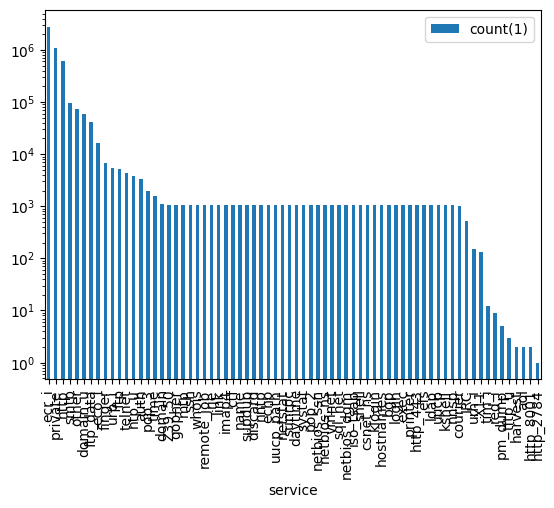

In [38]:
pandas_df.sort_values(by='count(1)',ascending=False).plot(x
='service', y='count(1)', kind = 'bar', logy=True)